Code created by Margot Wagner (2/26/2020)

In [27]:
# import packages
import scipy as sp
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

In [19]:
# Create voltage waveform Vm(t)
# In this example, v_m(t) = v_m_const * H(t - t_input)


def v_m(t):
    """
    Function for the membrane voltage waveform as a function of time Vm(t)
    input:    time t (value or array)
    output:   Vm(t) = 30*H(t-t_input)
    """
    v_m_const = 30  # mV
    t_input = 10  # S

    return v_m_const * (t >= t_input)

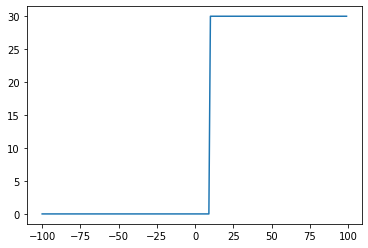

In [20]:
t = sp.arange(-100, 100)
plt.plot(t, v_m(t))
plt.show()

In [21]:
# Define the transition rates (as a function of time implicitly)


def alpha_n(t):
    """
    Function for the opening rate as a function of time Vm(t)
    input:    time t (value or array)
    output:   alpha_n = alpha_0*exp(lamda*Vm)
    """
    alpha_0 = 0.6  # 1/s
    lambda_const = 0.02  # 1/mV

    return alpha_0 * np.exp(lambda_const * v_m(t))

In [22]:
def beta_n(t):
    """
    Function for the closing rate as a function of time Vm(t)
    input:    time t (value or array)
    output:   beta_n = beta_0*exp(mu*Vm)
    """
    beta_0 = 0.8  # 1/s
    mu_const = 0.02  # 1/mV

    return beta_0 * np.exp(mu_const * v_m(t))

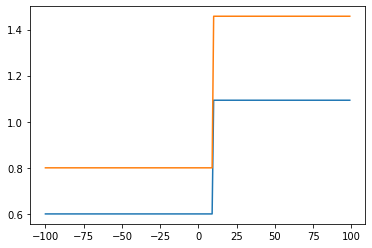

In [24]:
# Plot transition rates as a function of time
t = sp.arange(-100, 100)
plt.plot(t, alpha_n(t))
plt.plot(t, beta_n(t))

In [25]:
# Solve for number of open channels as a function of time
# using rate equation


def dndt(n, t):
    """
    Rate equation for mean number of open channels
    input:    time (t) [value or array]
              number of open channels (n)
    output:   rate equation
    """
    return alpha_n(t) * (1 - n) - beta_n(t) * n

In [29]:
t = sp.arange(0, 20)

n_t = odeint(dndt, [0], t)

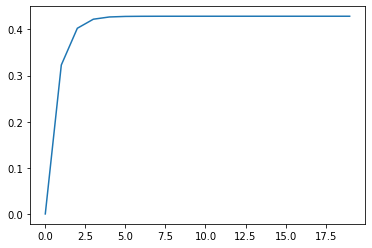

In [30]:
plt.plot(t, n_t)

In [31]:
# Simulate Markov process for stochastically opening and closing channels
def markov_n_channels(n, t, dt):
    """
    Function to simulate to opening and closing of channels as a Markov process

    input:    number of channels (n) [int]
              time (t)               [int/double or 1d array]
              time step (dt)         [int/double]

    output:   fraction of open channels over time (output) [1d array]
    """

    # All gates start closed
    gate_states = [0] * n
    output = []

    for tp in t:
        for gate in range(n):
            # Roll the dice for each gate at each time point
            r = np.random.rand()
            if gate_states[gate] == 0:
                # Test if closed opens
                gate_states[gate] = int(r < (alpha_n(tp) * dt))
            else:
                # Test if opened closes
                gate_states[gate] = int(r < (1 - beta_n(tp) * dt))
        output.append(sum(gate_states) * 1.0 / n)
    return output

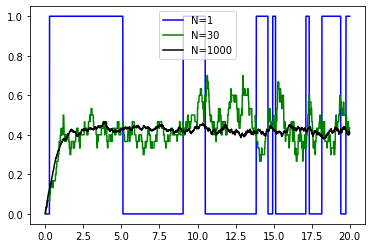

In [35]:
dt = 0.01
t = sp.arange(0, 20, dt)

plt.plot(t, markov_n_channels(1, t, dt), color="blue", label="N=1")
plt.plot(t, markov_n_channels(30, t, dt), color="green", label="N=30")
plt.plot(t, markov_n_channels(1000, t, dt), color="black", label="N=1000")
plt.legend()

plt.show()